In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
X_train = pd.read_csv("train_features.csv")
y_train = pd.read_csv("train_targets.csv")
X_test = pd.read_csv("test_features.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [3]:
X_train.set_index("id")
y_train.set_index("id")
X_test.set_index("id")

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE DATE,MEDIAN INCOME,MEAN INCOME,POPULATION
id,,,,,,,,,,,,,,,,,,,,,
test0,1,CHELSEA,22 STORE BUILDINGS,4,717,5,,K1,459 WEST 19TH STREET,,...,1,3800.0,3800.0,1910,4,K1,2017-06-27 00:00:00,92359.4888,160936.5432,45899
test1,3,BEDFORD STUYVESANT,13 CONDOS - ELEVATOR APARTMENTS,2,1886,1550,,R4,49 SKILLMAN STREET,1B,...,1,0.0,0.0,2012,2,R4,2016-09-06 00:00:00,42903.7942,57436.7240,35648
test2,5,ROSEBANK,02 TWO FAMILY DWELLINGS,1,2977,40,,B9,47 FOX HILL TERRACE,,...,2,3125.0,1584.0,2002,1,B9,2017-07-27 00:00:00,58937.6580,75468.7376,37014
test3,3,PARK SLOPE,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,934,1405,,R1,134 ST. MARKS PLACE,3A,...,1,0.0,0.0,0,2,R1,2017-07-12 00:00:00,72610.5963,102949.5131,35641
test4,3,DOWNTOWN-FULTON MALL,13 CONDOS - ELEVATOR APARTMENTS,2,269,1180,,R4,110 LIVINGSTON STREET,10O,...,1,0.0,0.0,1926,2,R4,2016-11-29 00:00:00,92174.8101,140857.9804,48101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
test9284,1,WASHINGTON HEIGHTS LOWER,07 RENTALS - WALKUP APARTMENTS,2,2117,20,,C4,532 WEST 159 STREET,,...,20,2498.0,9685.0,1913,2,C4,2016-12-21 00:00:00,29535.9721,40902.4289,54744
test9285,5,RICHMONDTOWN-LIGHTHS HILL,01 ONE FAMILY DWELLINGS,1,2287,85,,A3,329 LIGHTHOUSE AVENUE,,...,1,10600.0,2688.0,1970,1,A3,2017-03-10 00:00:00,75212.0632,91445.7035,54812
test9286,4,CORONA,03 THREE FAMILY DWELLINGS,1,1940,134,,C0,102-17 LEWIS AVE,,...,3,2000.0,3162.0,1969,1,C0,2017-06-28 00:00:00,43962.6552,54259.4037,95662


In [4]:
X = X_train[["LAND SQUARE FEET", "GROSS SQUARE FEET", "MEDIAN INCOME", "MEAN INCOME"]]
Y = y_train["SALE PRICE"]

In [5]:
model = linear_model.LinearRegression()
model.fit(X,Y)
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 -839621.1447765732
Coefficients: 
 [-103.74858556  219.45065715 -134.32839719  131.63102758]


In [6]:
x_test_predictions = pd.DataFrame(model.predict(X_test[["LAND SQUARE FEET", "GROSS SQUARE FEET", "MEDIAN INCOME", "MEAN INCOME"]]))
x_test_predictions.index = X_test["id"]
x_test_predictions.columns = ["SALE PRICE"]
x_test_predictions.to_csv("submission.csv")
x_test_predictions.head()

,SALE PRICE
id,
test0,8.377787e+06
test1,9.576359e+05
test2,1.200801e+06
test3,2.958064e+06
test4,5.319965e+06


In [7]:
# !kaggle competitions submit -c saas-2020-fall-cx-kaggle-compeition -f submission.csv -m "Multiple Linear Regression test 1"

In [22]:
train_merged = X_train.merge(right = y_train, on = "id")
train_merged.head()

,id,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE DATE,MEDIAN INCOME,MEAN INCOME,POPULATION,SALE PRICE
0,train0,2,BAYCHESTER,01 ONE FAMILY DWELLINGS,1,4970,6,,A1,4031 ROMBOUTS,...,2760.0,1056.0,1925,1,A1,2017-03-27 00:00:00,48469.7389,57368.0989,68662,315000.0
1,train1,3,MILL BASIN,01 ONE FAMILY DWELLINGS,1,8621,30,,A1,202 WHITMAN DRIVE,...,4317.0,2424.0,1960,1,A1,2017-04-27 00:00:00,67952.9473,77076.9976,81033,995000.0
2,train2,3,MIDWOOD,01 ONE FAMILY DWELLINGS,1,7557,18,,A1,117 KENILWORTH PLACE,...,1975.0,1460.0,1915,1,A1,2017-05-19 00:00:00,55000.8962,69161.9360,67349,627500.0
3,train3,3,CLINTON HILL,07 RENTALS - WALKUP APARTMENTS,2A,1965,72,,C4,378 GRAND AVENUE,...,2200.0,7040.0,1930,2,C4,2017-06-26 00:00:00,61468.5107,79249.3305,49085,3200000.0
4,train4,2,WILLIAMSBRIDGE,02 TWO FAMILY DWELLINGS,1,4866,70,,B1,950 EAST 231 STREET,...,2136.0,1272.0,1935,1,B1,2016-10-13 00:00:00,48469.7389,57368.0989,68662,440000.0


In [25]:
# Remove outliers
train_merged[(np.abs(stats.zscore(train_merged["GROSS SQUARE FEET"])) < 3).all(axis=1)]

AxisError: axis 1 is out of bounds for array of dimension 1

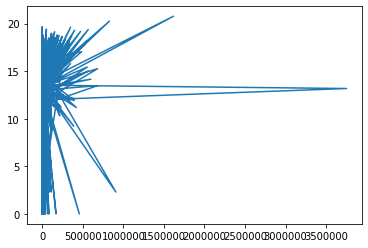

In [20]:
plt.plot(X_train["GROSS SQUARE FEET"], np.log(y_train["SALE PRICE"]))

In [16]:
np.std(X_train["LAND SQUARE FEET"])

3475.8588860178006